# 유통고객 구매패턴 데이터 전처리
## 단계1. 데이터 탐색 및 준비

## 0.미션

### (1) 미션① : 비즈니스 정보 파악
* 예제 질문 9개 조회를 수행해냅니다.


### (2) 미션 ② : 데이터 구조 만들기

* 고객 이탈을 정의하고, 데이터를 생성합니다.
    * 대상 고객
        * 2014 ~ 2016년 신규 가입 고객 이면서,
        * 2016년 하반기에 한번 이상 방문한 고객을 대상 고객으로 정의합니다.
    * Labeling
        * 위 대상 고객 중, 2017년 1~3월(3개월)동안 방문(구매)하지 않은 사람은 이탈로 간주합니다.
    * feature 추가하기
        * 주어진 기본 feature 3가지를 생성합니다.

## 1.환경설정

### (1) 라이브러리 설치하기
아래를 실행해주세요.

In [1]:
!pip install matplotlib
!pip install --upgrade matplotlib

import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### (2) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [2]:
#[문제1] pandas, numpy, matplotlib 라이브러리를 임포트하세요.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### (3) 데이터 불러오기

* 주어진 데이터셋
    * customers.csv : 고객정보
    * sales.csv : 판매정보
    * products.csv : 상품정보
    
* 다음과 같이 데이터를 저장하세요.
    * 주피터랩 실행
        * 제공된 압축파일 '미프 1차_구매'를 다운받아 압축을 푼다.
        * anaconda의 root directory(보통 C:\Users\<ID> 에 '미프 1차_구매' 폴더를 만들고, 복사하고 붙여넣습니다.
        * '미프 1차_구매' 폴더에 필요한 파일들을 넣고, 본 파일 '데이터 전처리_교육생용' 실습파일을 불러옵니다

* 세부 요구사항
    - 데이터셋을 각각 불러와서 데이터프레임으로 저장합니다.
    - 날짜 데이터들은 날짜형식으로 변환합니다. (customers['RegisterDate'], sales['OrderDate'])
    - 기본 정보를 확인합니다.(.shape, .info(), .head())

In [4]:
#[문제2] '미프 1차_구매' 폴더에서 본 파일들을 열어주세요.

In [3]:
# 전체 데이터 불러오기
customers = pd.read_csv('customers.csv')
sales = pd.read_csv('sales.csv')
products = pd.read_csv('products.csv')

In [6]:
#[문제3] 'customers', 'sales' 데이터의 상단 일부 행을 출력해보세요.

In [4]:
customers.head()


,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2
0,c328222,2014-09-25,F,1960,강원도,원주시
1,c281448,2013-06-18,F,1974,강원도,원주시
2,c038336,2003-10-10,F,1968,강원도,춘천시
3,c084237,2007-03-09,F,1982,강원도,강릉시
4,c162600,2010-06-14,F,1978,강원도,속초시


In [5]:
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,107,2,2016-01-02,p1036481,2,2100,c150417
1,69,1,2016-01-02,p1152861,1,1091,c212716
2,69,7,2016-01-02,p1013161,1,2600,c212716
3,69,8,2016-01-02,p1005771,1,1650,c212716
4,69,11,2016-01-02,p1089531,1,2600,c212716


In [9]:
#[문제4] 'customers'와 'sales' 데이터프레임의 구조와 기본 통계정보를 출력해보세요.

In [6]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    2243 non-null   object
 1   RegisterDate  2243 non-null   object
 2   Gender        2243 non-null   object
 3   BirthYear     2243 non-null   int64 
 4   Addr1         2243 non-null   object
 5   Addr2         2243 non-null   object
dtypes: int64(1), object(5)
memory usage: 105.3+ KB


In [7]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70012 entries, 0 to 70011
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     70012 non-null  int64 
 1   Seq         70012 non-null  int64 
 2   OrderDate   70012 non-null  object
 3   ProductID   70012 non-null  object
 4   Qty         70012 non-null  int64 
 5   Amt         70012 non-null  int64 
 6   CustomerID  70012 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.7+ MB


In [12]:
#[문제5] 날짜 데이터를 날짜형식으로 변환해주세요. 날짜데이터 : customers['RegisterDate'], sales['OrderDate']

In [8]:
customers['RegisterDate'] = pd.to_datetime(customers['RegisterDate'])
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])


In [14]:
#[문제6] 'customers'의 데이터타입이 날짜형식으로 잘 변환되었는지 확인해주세요.


In [9]:
customers['RegisterDate'].head()

0   2014-09-25
1   2013-06-18
2   2003-10-10
3   2007-03-09
4   2010-06-14
Name: RegisterDate, dtype: datetime64[ns]

In [15]:
#[문제7] 'sales'의 데이터타입이 날짜형식으로 변환되었는지 확인해주세요.

In [10]:
sales['OrderDate'].head()

0   2016-01-02
1   2016-01-02
2   2016-01-02
3   2016-01-02
4   2016-01-02
Name: OrderDate, dtype: datetime64[ns]

In [16]:
#[문제8] 'sales' 데이터의 'OrderDate'의 최소값과 최대값을 표시해주세요.

In [11]:
print(sales['OrderDate'].min())
print(sales['OrderDate'].max())

2016-01-02 00:00:00
2017-03-31 00:00:00


## 2.데이터 탐색

주어진 데이터에 대해서 다음의 요건에 맞게 조회하면서 데이터를 파악해 봅시다.

* **상세요구사항**
    * 아래 예제 질문 9개에 대해 조회를 수행합니다.
    * 예제 질문
        * Q01) 일별 매출액
        * Q02) 월별 매출액
        * Q03) 요일별 매출액 평균
        * Q04) 일별 고객 1인당 평균 구매액(객단가)
        * Q05) 일별 방문 고객수(구매 고객수)
        * Q06) 매출 상위 top 10 상품
        * Q07) 요일별 매출상위 Top 10 상품
        * Q08) 카테고리별 매출 비중
        * Q09) 고객 나이대

### Q01) 일별 매출액

In [18]:
#[문제9] 'sales' 데이터프레임에서 일별 매출액의 합계를 'daily_sales' 데이터 프레임에 할당하세요.

In [12]:
daily_sales = sales.groupby('OrderDate', as_index = False)[['Amt']].sum()
daily_sales.head()

,OrderDate,Amt
0,2016-01-02,503234
1,2016-01-03,211202
2,2016-01-04,705195
3,2016-01-05,502803
4,2016-01-06,485984


In [20]:
#[문제10] 'sales' 데이터프레임에서 부분인 2016년 1월~3월까지 3개월의 범위로 데이터를 선택하고 'daily_sales'에 할당하세요.

In [13]:
daily_sales = sales.loc[sales['OrderDate'].between('2016-01-02','2016-03-31'), : ]
daily_sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,107,2,2016-01-02,p1036481,2,2100,c150417
1,69,1,2016-01-02,p1152861,1,1091,c212716
2,69,7,2016-01-02,p1013161,1,2600,c212716
3,69,8,2016-01-02,p1005771,1,1650,c212716
4,69,11,2016-01-02,p1089531,1,2600,c212716


In [22]:
#[문제11] 일자별 매출액을 'daily_sales' 데이터 프레임에 저장해주세요.

In [14]:
daily_sales = sales.groupby('OrderDate', as_index = False)[['Amt']].sum()


In [24]:
#[문제12] 'daily_sales' 데이터를 확인해보세요.

In [15]:
daily_sales.head()

,OrderDate,Amt
0,2016-01-02,503234
1,2016-01-03,211202
2,2016-01-04,705195
3,2016-01-05,502803
4,2016-01-06,485984


### Q02) 월별 매출액

In [25]:
#[문제13] 기간별 조회를 위해 'sales' 데이터프레임에 주문일자의 연도와 월의 변수를 추가해주세요.

In [16]:
sales['Year'] = sales['OrderDate'].dt.year
sales['Month'] = sales['OrderDate'].dt.month


In [27]:
#[문제14] 월별 매출액의 합계를 구하고 'monthly_sales'에 저장해주세요.

In [17]:
monthly_sales = sales.groupby('Month', as_index = False)[['Amt']].sum()

In [29]:
#[문제15] 'monthly_sales'를 출력하고 확인해주세요.

In [18]:
monthly_sales.head()

,Month,Amt
0,1,28931745
1,2,26927354
2,3,32696199
3,4,15129917
4,5,13976941


### Q03) 요일별 매출액 평균

In [30]:
#[문제16] 'sales' 데이터프레임에서 주문일자 기준 일별 매출액의 합계를 구해 'day_sales'에 저장하세요.


In [19]:
day_sales = sales.groupby('OrderDate', as_index = False)[['Amt']].sum()


In [32]:
#[문제17] 'day_sales'에서 'OrderDate' 열의 날짜 정보를 활용하여 'Weekday' 열을 추가하세요.

In [21]:
day_sales['Weekday'] = day_sales['OrderDate'].dt.day_name()


In [34]:
#[문제18] day_sales 데이터프레임의 'Weekday' 열을 출력하세요.

In [22]:
day_sales['Weekday'].head()

0     Saturday
1       Sunday
2       Monday
3      Tuesday
4    Wednesday
Name: Weekday, dtype: object

### Q04) 일별 고객 1인당 평균 구매액(객단가)

In [35]:
#[문제19] 'sales' 데이터프레임에서 주문일자,고객ID별 주문금액을 합산하여 'order_amt'에 저장하세요.


In [23]:
order_amt = sales.groupby(['OrderDate', 'CustomerID'], as_index=False)[['Amt']].sum()


In [37]:
#[문제20] 'order_amt'의 상단 10행을 출력하세요.


In [24]:
order_amt.head(10)


,OrderDate,CustomerID,Amt
0,2016-01-02,c029643,2650
1,2016-01-02,c047907,1650
2,2016-01-02,c068640,3300
3,2016-01-02,c082866,12350
4,2016-01-02,c083862,9504
5,2016-01-02,c085558,12710
6,2016-01-02,c090006,2841
7,2016-01-02,c090821,12500
8,2016-01-02,c104962,1650
9,2016-01-02,c105415,1300


In [39]:
#[문제21] 'order_amt'에서 주문일자별 고객 구매액의 총 평균을 구하고 'order_amt2'에 저장하세요.


In [26]:
order_amt2 = order_amt.groupby('OrderDate', as_index=False)[['Amt']].mean()
order_amt2.head()

,OrderDate,Amt
0,2016-01-02,7624.757576
1,2016-01-03,5415.435897
2,2016-01-04,6716.142857
3,2016-01-05,6364.594937
4,2016-01-06,6844.845070


### Q05) 일별 방문 고객수(구매 고객수)

In [41]:
#[문제22] 'order_amt'에서 일별 방문 고객수를 구하고 'daily_visit'으로 저장해주세요.


In [27]:
daily_visit = order_amt.groupby('OrderDate', as_index = False)[['CustomerID']].count()
daily_visit.head()

,OrderDate,CustomerID
0,2016-01-02,66
1,2016-01-03,39
2,2016-01-04,105
3,2016-01-05,79
4,2016-01-06,71


In [43]:
#[문제23] 'order_amt2'에 'daily_visit' 컬럼을 주문일자 기준 추가해주세요.

In [28]:
daily_visit = daily_visit.rename({'CustomerID':'daily_visit'}, axis=1)
order_amt2 = pd.merge(order_amt2, daily_visit, on='OrderDate', how='outer')

In [44]:
#[문제24] 'order_amt2' 데이터를 확인해보세요.

In [29]:
order_amt2.head()

,OrderDate,Amt,daily_visit
0,2016-01-02,7624.757576,66
1,2016-01-03,5415.435897,39
2,2016-01-04,6716.142857,105
3,2016-01-05,6364.594937,79
4,2016-01-06,6844.845070,71


### Q06) 매출 상위 top 10 상품

In [45]:
#[문제25] 'sales' 데이터와 'products' 데이터를 합쳐서 'top_amt'에 할당하세요.

In [30]:
top_amt = pd.merge(sales, products, on='ProductID', how='outer')
top_amt.head()


,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month,ProductName,Category,SubCategory
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,순두부,반찬류,두부
1,137,4,2016-01-02,p1036481,2,2100,c280590,2016,1,순두부,반찬류,두부
2,63,16,2016-01-03,p1036481,1,1050,c037915,2016,1,순두부,반찬류,두부
3,135,3,2016-01-04,p1036481,3,3150,c100815,2016,1,순두부,반찬류,두부
4,63,13,2016-01-06,p1036481,10,10500,c048405,2016,1,순두부,반찬류,두부


In [47]:
#[문제26] 상품명을 기준으로 매출 합계를 구하여 'top_amt2'에 저장하세요

In [32]:
top_amt2 = top_amt.groupby('ProductName', as_index=False)[['Amt']].sum()
top_amt2.head()

,ProductName,Amt
0,감귤컵푸딩,677154
1,감자칩,3676518
2,고구마스틱,1620986
3,깻잎,2930359
4,낱개캔디,479197


In [49]:
#[문제27] 'top_amt2' 데이터프레임을 'Amt'열 기준 상위 10개의 데이터를 선택하여 내림차순으로 정렬하고 'top10_amt'에 저장하세요.

In [33]:
top10_amt = top_amt2.sort_values(['Amt'], ascending=False)[:10]


In [51]:
#[문제28] 'top10_amt' 데이터프레임을 확인하세요.

In [34]:
top10_amt.head()

,ProductName,Amt
37,우유1000,18129067
23,사과_소,14078818
9,딸기_대,11011541
7,두부_대,10119037
10,딸기_소,7517664


### Q07) 카테고리별 매출 비중

In [52]:
#[문제29] 'sales'와 'products' 데이터프레임을 합치고 'cate_amt'에 저장하세요.

In [35]:
cate_amt = pd.merge(sales, products, on='ProductID', how='outer')
cate_amt.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month,ProductName,Category,SubCategory
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,순두부,반찬류,두부
1,137,4,2016-01-02,p1036481,2,2100,c280590,2016,1,순두부,반찬류,두부
2,63,16,2016-01-03,p1036481,1,1050,c037915,2016,1,순두부,반찬류,두부
3,135,3,2016-01-04,p1036481,3,3150,c100815,2016,1,순두부,반찬류,두부
4,63,13,2016-01-06,p1036481,10,10500,c048405,2016,1,순두부,반찬류,두부


In [54]:
#[문제30] 카테고리를 기준으로 매출 합계를 구하여 'cate_amt2'에 저장하세요.

In [36]:
cate_amt2 = cate_amt.groupby('Category', as_index=False)[['Amt']].sum()
cate_amt2.head()


,Category,Amt
0,간식,12920570
1,과일,49789339
2,반찬류,32204820
3,유제품,45261956
4,채소,54822783


In [56]:
#[문제31] 카테고리별 매출 비중을 구하여 'Rate' 변수를 'cate_amt2'에 추가해주세요. 

In [37]:
cate_amt2['Rate'] = cate_amt2['Amt'] / cate_amt2['Amt'].sum()


In [58]:
# 'cate_amt2'를 출력하세요.

In [38]:
cate_amt2.head()

,Category,Amt,Rate
0,간식,12920570,0.066260
1,과일,49789339,0.255331
2,반찬류,32204820,0.165153
3,유제품,45261956,0.232113
4,채소,54822783,0.281143


### Q08) 요일별 매출 비중

In [59]:
#[문제32] 'sales'와 'products' 데이터프레임을 합치고 'day_amt'에 저장하세요.

In [39]:
day_amt = pd.merge(sales, products, on='ProductID', how='outer')
day_amt.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month,ProductName,Category,SubCategory
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,순두부,반찬류,두부
1,137,4,2016-01-02,p1036481,2,2100,c280590,2016,1,순두부,반찬류,두부
2,63,16,2016-01-03,p1036481,1,1050,c037915,2016,1,순두부,반찬류,두부
3,135,3,2016-01-04,p1036481,3,3150,c100815,2016,1,순두부,반찬류,두부
4,63,13,2016-01-06,p1036481,10,10500,c048405,2016,1,순두부,반찬류,두부


In [60]:
#[문제33] 'day_amt' 데이터에서 'OrderDate' 열을 날짜 형식의 데이터타입으로 변환해주세요

In [40]:
day_amt['OrderDate'] = pd.to_datetime(day_amt['OrderDate'])

In [62]:
#[문제34] 'day_amt' 데이터에서 'OrderDate' 열의 날짜 정보를 활용하여 요일을 나타내는 'Weekday' 열을 추가하고 확인해주세요.

In [41]:
day_amt['Weekday'] = day_amt['OrderDate'].dt.day_name()


In [64]:
#[문제35] day_amt를 요일 기준 매출액의 합을 계산하고 day_amt2에 저장하세요.

In [42]:
day_amt2 = day_amt.groupby('Weekday', as_index = False)[['Amt']].sum()


In [43]:
#[문제36] day_amt2를 출력하세요.
day_amt2.head()

,Weekday,Amt
0,Friday,30838811
1,Monday,34484281
2,Saturday,28683620
3,Sunday,18358536
4,Thursday,26608397


In [67]:
#[문제37] 요일별 매출 비중을 구하여 'Rate' 변수를 'day_amt2'에 추가해주세요.

In [44]:
day_amt2['Rate'] = day_amt2['Amt'] / day_amt2['Amt'].sum()

In [45]:
#[문제38] day_amt2를 다시 출력하여 변수가 추가되었는지 확인해주세요.
day_amt2.head()

,Weekday,Amt,Rate
0,Friday,30838811,0.158148
1,Monday,34484281,0.176843
2,Saturday,28683620,0.147096
3,Sunday,18358536,0.094147
4,Thursday,26608397,0.136454


### Q09) 고객 나이대

In [69]:
#[문제39] 고객의 태어난 연도를 활용하여 'Age'(고객 나이) 컬럼을 추가 합니다. (현재 : 2016년)

In [47]:
customers['Age'] = 2016 - customers['BirthYear']


In [71]:
#[문제40] 고객이 몇십대 인지 'Age' 컬럼을 활용하여 'AgeGroup'(연령대) 컬럼을 추가 합니다.

In [48]:
customers['AgeGroup'] = customers['Age'] // 10 * 10


In [73]:
#[문제41] 'customers' 데이터의 상단 5행을 출력하세요.

In [49]:
customers.head(5)

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50
1,c281448,2013-06-18,F,1974,강원도,원주시,42,40
2,c038336,2003-10-10,F,1968,강원도,춘천시,48,40
3,c084237,2007-03-09,F,1982,강원도,강릉시,34,30
4,c162600,2010-06-14,F,1978,강원도,속초시,38,30


In [ ]:
#[추가문제42] 고객의 성별과 구매연도에 대한 가변수를 만들고 'encoded_data'에 저장하세요.

In [50]:
merged_data = pd.merge(customers, sales, on='CustomerID', how = 'outer')
encoded_data = pd.get_dummies(merged_data, columns=['Gender'], drop_first=True)
encoded_data.head()


,CustomerID,RegisterDate,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month,Gender_M
0,c328222,2014-09-25,1960,강원도,원주시,56,50,155,1,2016-02-24,p1001771,1,3300,2016,2,0
1,c328222,2014-09-25,1960,강원도,원주시,56,50,143,5,2016-03-03,p1191881,1,1750,2016,3,0
2,c328222,2014-09-25,1960,강원도,원주시,56,50,143,8,2016-03-03,p1005621,1,2900,2016,3,0
3,c328222,2014-09-25,1960,강원도,원주시,56,50,143,10,2016-03-03,p1133371,2,2000,2016,3,0
4,c328222,2014-09-25,1960,강원도,원주시,56,50,143,11,2016-03-03,p1005891,1,1950,2016,3,0


In [51]:
encoded_data = pd.get_dummies(encoded_data, columns=['Year'], drop_first=True)
encoded_data.head()

,CustomerID,RegisterDate,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Month,Gender_M,Year_2017
0,c328222,2014-09-25,1960,강원도,원주시,56,50,155,1,2016-02-24,p1001771,1,3300,2,0,0
1,c328222,2014-09-25,1960,강원도,원주시,56,50,143,5,2016-03-03,p1191881,1,1750,3,0,0
2,c328222,2014-09-25,1960,강원도,원주시,56,50,143,8,2016-03-03,p1005621,1,2900,3,0,0
3,c328222,2014-09-25,1960,강원도,원주시,56,50,143,10,2016-03-03,p1133371,2,2000,3,0,0
4,c328222,2014-09-25,1960,강원도,원주시,56,50,143,11,2016-03-03,p1005891,1,1950,3,0,0


## 3.고객 이탈 정의

### (1) Label 만들기

* **Label이란?**
    * 라벨링이란 데이터의 의미 있는 값을 부여하여 구분하거나 분류하는 작업입니다.
    * 라벨링을 통해 데이터를 분석하거나 모델링하는 과정을 더 의미있게 만듭니다.
    * 예를 들면 이메일이 '스팸'인지 '정상'인지를 분류하거나, 데이터를 그룹화하거나 참인지 거짓인지 이진 분류하거나,
      순서를 표현하거나, 카테고리화하는 등 데이터의 특성에 따라 라벨링을 적용합니다.
* **Target이란?**
    * 타겟은 데이터 분석에서 예측하거나 분류하고자 하는 대상을 말합니다. 즉 우리가 예측하려는 값입니다.
    * 즉 타겟은 예측하거나 분류하려는 대상이나 범주이며, 타겟변수는 그 값을 의미합니다. 
    * 라벨과 타겟은 비슷한 개념이지만 라벨은 데이터의 특성이나 카테고리를 설명하기 위해 나타내는 값이며, 
      타겟은 모델이 예측하려는 대상 결과값이라고 이해해주세요.
* **세부 요구사항**
    * 고객의 이탈여부에 해당하는 Target변수를 생성하시오.
    * 대상 고객
        * 2014 ~ 2016년 신규 가입 고객 이면서,
        * 2016년 하반기에 한번 이상 방문한 고객이 대상 고객입니다.
    * Labeling
        * 위 대상 고객 중, 2017년 1~3월(3개월)동안 방문(구매)하지 않은 사람은 이탈로 간주합니다.
        * 이탈고객은 1, 이탈하지 않은 고객은 0으로 정의

#### 1) 대상고객 만들기

In [74]:
#[문제43] 'customers' 데이터에서 2014 ~ 2016년 신규 가입 고객을 'cust01'에 할당하세요.

In [52]:
cust01 = customers.loc[customers['RegisterDate'].between('2014-01-01','2016-12-31'), ['CustomerID']]


In [76]:
#[문제44] 'cust01'을 출력하세요.

In [53]:
cust01.head()

,CustomerID
0,c328222
12,c354310
16,c390828
28,c386399
30,c367116


In [77]:
#[문제45] 'sales' 데이터에서 2016년 하반기에 방문한 고객을 'cust02'에 할당하세요.

In [54]:
cust02 = sales.loc[sales['OrderDate'].between('2016-07-01','2016-12-31'), ['CustomerID']]
cust02.head()


,CustomerID
29519,c127482
29520,c127482
29521,c127482
29522,c217179
29523,c222561


In [79]:
#[문제46] 2016년 하반기에 한번 이상 방문한 고객을 'cust02'에 할당하세요.

In [55]:
cust02 = cust02.drop_duplicates('CustomerID')


In [81]:
#[문제47] 'cust02'을 출력하세요.

In [56]:
cust02.head()

,CustomerID
29519,c127482
29522,c217179
29523,c222561
29526,c333911
29527,c373441


In [82]:
#[문제48] 대상고객 목록인 'cust01', 'cust02' 데이터를 합쳐서 'cust_churn0'으로 할당하세요.

In [57]:
cust_churn0 = pd.merge(cust01, cust02, on='CustomerID', how='inner')


In [84]:
#[문제49] 'cust_churn0'을 상단 5행 출력하세요.

In [58]:
cust_churn0.head(5)

,CustomerID
0,c328222
1,c354310
2,c390828
3,c386399
4,c367116


#### 2) Label 만들기

In [85]:
#[문제50] sales 데이터프레임에서 2017년 1~3월 구매 고객을 'cust03'에 할당하세요

In [59]:
cust03 = sales.loc[sales['OrderDate'].between('2017-01-01', '2017-03-31'), ['CustomerID']]
cust03 = cust03.drop_duplicates('CustomerID', keep='first')
cust03.head()


,CustomerID
55976,c271068
55982,c146132
55983,c226242
55984,c140658
55985,c328839


In [87]:
#[문제51] cust03에 'churn' 열을 추가하고, 해당 열의 모든 값에 0을 할당하세요.

In [60]:
cust03['churn'] = 0
cust03.head()

,CustomerID,churn
55976,c271068,0
55982,c146132,0
55983,c226242,0
55984,c140658,0
55985,c328839,0


In [88]:
#[문제52] 대상고객 목록인 'cust_churn0'과 2017년 1~3월 구매고객인 'cust03'을 합쳐서 'cust_churn0'으로 저장하세요.

In [61]:
cust_churn0 = pd.merge(cust_churn0, cust03, on='CustomerID', how='left')


In [90]:
#[문제53] 'cust_churn0'을 상단 5행 출력하세요.

In [62]:
cust_churn0.head(5)

,CustomerID,churn
0,c328222,0.0
1,c354310,NaN
2,c390828,NaN
3,c386399,NaN
4,c367116,0.0


In [91]:
#[문제54] cust_churn0 데이터의 churn 열의 NAN은 이탈 고객이다. 이탈고객은 1로 채워주세요.

In [63]:
cust_churn0.fillna(1, inplace=True)


In [93]:
#[문제55] 데이터프레임 cust_churn0의 'churn' 열의 데이터 타입을 정수형(int64)으로 변환하세요.

In [64]:
cust_churn0['churn'] = cust_churn0['churn'].astype('int64')


In [95]:
#[문제56] 데이터프레임 cust_churn0의 각 값들의 개수를 반환하여 고객 이탈 여부의 빈도수를 확인해주세요.

In [65]:
cust_churn0['churn'].value_counts() / cust_churn0['churn'].count()


0    0.66362
1    0.33638
Name: churn, dtype: float64

### (2) feature 추가하기

* **feature란**
    * Feature란 데이터에서 추출한 변수나 속성을 의미합니다.
    * 각각의 열을 feature라고 간주할 수 있습니다.
    * 올바른 feature를 선택하고 가공하여 생성하는 것은 데이터 분석에서 모델을 학습하거나 예측을 수행하는데 중요합니다.
* **세부 요구사항**
    * 기본 feature 3가지를 생성해봅니다.
        * 1) 가입연차
        * 2) 최근 3개월(2016년10~12월)간 방문 횟수
        * 3) 최근 3개월(2016년10~12월)간 구매금액

#### feature 3가지 생성

* ① 가입연수(RegDuration)
* ② 최근 3개월(2016년10~12월)간 방문 횟수
* ③ 최근 3개월(2016년10~12월)간 구매금액

In [97]:
#<① 가입연수> 
#[문제57] 'RegisterDate' 열의 데이터는 datetime 형식으로 변환합니다.

In [66]:
customers['RegisterDate'] = pd.to_datetime(customers['RegisterDate'])


In [99]:
#[문제58] 2016-12-31 기준으로 가입 연수 'RegDuration' 열을 'cust_churn0'에 추가하여 출력해주세요.

In [67]:
cust_churn0['RegDuration'] = 2016 - customers['RegisterDate'].dt.year
cust_churn0.head()


,CustomerID,churn,RegDuration
0,c328222,0,2
1,c354310,1,3
2,c390828,1,13
3,c386399,1,9
4,c367116,0,6


In [101]:
#<② 3개월간 방문 횟수> 
#[문제59] sales에서 주문일자('OrderDate')가 '2016-10-01'부터 '2016-12-31' 사이인 데이터를 선택하여 'temp'에 저장하세요.

In [68]:
temp = sales.loc[sales['OrderDate'].between('2016-10-01', '2016-12-31'), :]


In [103]:
#<② 3개월간 방문 횟수> 
#[문제60] 'OrderID', 'OrderDate', 'CustomerID' 열만을 필터링해서 중복된 행을 제거하고 'temp'에 저장하여 출력하세요.

In [69]:
temp = temp[['OrderID', 'OrderDate', 'CustomerID']]
temp = temp.drop_duplicates('CustomerID')
temp.head()


,OrderID,OrderDate,CustomerID
43455,57,2016-10-01,c155875
43456,59,2016-10-01,c177682
43457,63,2016-10-01,c314136
43461,65,2016-10-01,c319923
43463,69,2016-10-01,c302963


In [105]:
#<② 3개월간 방문 횟수>  
#[문제61] 'temp' 데이터에서 각 고객별 'OrderDate'열의 개수를 세어서 'temp2'에 저장하세요.

In [70]:
temp2 = temp.groupby('CustomerID', as_index = False)[['OrderDate']].count()
temp2.head()


,CustomerID,OrderDate
0,c017487,1
1,c017503,1
2,c017517,1
3,c017522,1
4,c017526,1


In [107]:
#<② 3개월간 방문 횟수>  
#[문제62] 'temp2' 데이터의 'OrderDate' 열의 이름을 'Visit_3M_Cnt'로 변경하고 확인해주세요.

In [71]:
temp2 = temp2.rename({'OrderDate':'Visit_3M_Cnt'}, axis=1)
temp2.head()


,CustomerID,Visit_3M_Cnt
0,c017487,1
1,c017503,1
2,c017517,1
3,c017522,1
4,c017526,1


In [109]:
#<② 3개월간 방문 횟수> 
#[문제63] cust_churn0과 temp2을 합쳐서 'cust_churn1'으로 저장하세요. how= 'left'로 기존 데이터는 유지해주세요.  

In [72]:
cust_churn1 = pd.merge(cust_churn0, temp2, on='CustomerID', how = 'left')


In [111]:
#[문제64] cust_churn1 출력하고 확인해주세요.

In [73]:
cust_churn1.head()

,CustomerID,churn,RegDuration,Visit_3M_Cnt
0,c328222,0,2,1.0
1,c354310,1,3,1.0
2,c390828,1,13,1.0
3,c386399,1,9,1.0
4,c367116,0,6,NaN


In [112]:
#<③ 3개월간 구매금액>
#[문제65] 최근 3개월(2016-10-01~2016-12-31)간 고객별 구매금액을 계산하여 'temp'에 저장해주세요.

In [74]:
temp = sales.loc[sales['OrderDate'].between('2016-10-01', '2016-12-31'), ['CustomerID', 'Amt']]
temp.head()


,CustomerID,Amt
43455,c155875,1850
43456,c177682,1864
43457,c314136,3450
43458,c314136,4600
43459,c314136,1182


In [114]:
#<③ 3개월간 구매금액>
#[문제66] 데이터프레임 temp를 'CustomerID'를 기준으로 그룹화하고 각 고객별로 'Amt' 열의 합을 계산하여 'temp2'를 생성하세요.

In [75]:
temp2 = temp.groupby('CustomerID', as_index = False)[['Amt']].sum()
temp2.head()


,CustomerID,Amt
0,c017487,44206
1,c017503,24400
2,c017517,57971
3,c017522,22027
4,c017526,9750


In [116]:
#<③ 3개월간 구매금액>
#[문제67] 'temp2'에서 'Amt'열의 이름을 'Amt_3M_sum'으로 변경해주세요. 

In [76]:
temp2 = temp2.rename({'Amt':'Amt_3M_sum'}, axis=1)


In [118]:
#<③ 3개월간 구매금액>
#[문제68] cust_churn1, temp2을 합쳐서 'cust_churn2'으로 저장하세요.

In [77]:
cust_churn2 = pd.merge(cust_churn1, temp2, on='CustomerID', how='left')


In [120]:
#[문제69] 'cust_churn2'를 출력하고 확인하세요.

In [78]:
cust_churn2.head()

,CustomerID,churn,RegDuration,Visit_3M_Cnt,Amt_3M_sum
0,c328222,0,2,1.0,47979.0
1,c354310,1,3,1.0,8800.0
2,c390828,1,13,1.0,18172.0
3,c386399,1,9,1.0,3150.0
4,c367116,0,6,NaN,NaN


In [79]:
cust_churn2 = cust_churn2.fillna(0)

In [121]:
#[문제70] cust_churn2를 cust_churn으로 저장하세요.

In [80]:
cust_churn = cust_churn2

## 4.데이터셋 저장

* **세부 요구사항**
    * to_csv를 이용하여 전처리된 데이터셋을 저장하세요.
    * 저장할 파일의 확장자는 .csv 입니다.

In [122]:
#[문제71] 전처리된 데이터프레임 'cust_churn'을 CSV 파일로 저장합니다.

In [81]:
# 파일 : 'cust_churn.csv'
cust_churn.to_csv('cust_churn.csv', index = False)

In [124]:
#[문제72] 데이터가 잘 저장되었는지 다시 한번 불러오고 확인해보세요.

In [82]:
check = pd.read_csv('cust_churn.csv')
check.head()

,CustomerID,churn,RegDuration,Visit_3M_Cnt,Amt_3M_sum
0,c328222,0,2,1.0,47979.0
1,c354310,1,3,1.0,8800.0
2,c390828,1,13,1.0,18172.0
3,c386399,1,9,1.0,3150.0
4,c367116,0,6,0.0,0.0


In [125]:
## 정말 고생 많으셨습니다.
## 시간이 남으시는 분은 중급용 파일을 다시 한번 복기해보세요.

#### 추가 진행 사항

#### #1 연도별 방문 변화량과 이탈의 상관관계

In [84]:
print(customers.columns)
print(products.columns)
print(sales.columns)

Index(['CustomerID', 'RegisterDate', 'Gender', 'BirthYear', 'Addr1', 'Addr2',
       'Age', 'AgeGroup'],
      dtype='object')
Index(['ProductID', 'ProductName', 'Category', 'SubCategory'], dtype='object')
Index(['OrderID', 'Seq', 'OrderDate', 'ProductID', 'Qty', 'Amt', 'CustomerID',
       'Year', 'Month'],
      dtype='object')


In [88]:
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1
1,69,1,2016-01-02,p1152861,1,1091,c212716,2016,1
2,69,7,2016-01-02,p1013161,1,2600,c212716,2016,1
3,69,8,2016-01-02,p1005771,1,1650,c212716,2016,1
4,69,11,2016-01-02,p1089531,1,2600,c212716,2016,1


In [99]:
temp = sales.groupby('CustomerID', as_index=False)[['Year']].value_counts()
temp.head()

,CustomerID,Year,count
0,c017487,2016,75
1,c017487,2017,19
2,c017503,2016,31
3,c017503,2017,6
4,c017517,2016,98


In [106]:
temp1 = temp[temp['Year']==2016][['CustomerID', 'count']]
temp1 = temp1.rename({'count':'2016'}, axis=1)
temp1.head()

,CustomerID,2016
0,c017487,75
2,c017503,31
4,c017517,98
6,c017522,46
8,c017526,19


In [107]:
temp2 = temp[temp['Year']==2017][['CustomerID', 'count']]
temp2 = temp2.rename({'count':'2017'}, axis=1)
temp2.head()

,CustomerID,2017
1,c017487,19
3,c017503,6
5,c017517,31
7,c017522,15
9,c017526,2


In [114]:
check.shape

(547, 5)

In [117]:
temp = pd.merge(temp1, temp2, on='CustomerID', how='outer')
temp = temp.fillna(0)
temp['diff'] = temp['2017'] - temp['2016']
temp.head()

,CustomerID,2016,2017,diff
0,c017487,75.0,19.0,-56.0
1,c017503,31.0,6.0,-25.0
2,c017517,98.0,31.0,-67.0
3,c017522,46.0,15.0,-31.0
4,c017526,19.0,2.0,-17.0


In [122]:
temp3 = cust_churn0[['CustomerID','churn']]
temp3.head()

,CustomerID,churn
0,c328222,0
1,c354310,1
2,c390828,1
3,c386399,1
4,c367116,0


In [129]:
temp.shape

(2243, 4)

In [125]:
diff_churn = pd.merge(temp, temp3, on='CustomerID', how='inner')
diff_churn.head()

,CustomerID,2016,2017,diff,churn
0,c304973,25.0,2.0,-23.0,0
1,c305065,11.0,1.0,-10.0,0
2,c305120,37.0,4.0,-33.0,0
3,c305143,44.0,11.0,-33.0,0
4,c305163,33.0,10.0,-23.0,0


In [142]:
ft1 = diff_churn.groupby('churn', as_index=False)[['diff']].mean()
ft1.head()

,churn,diff
0,0,-23.509642
1,1,-9.010870


In [144]:
ft1 = diff_churn.groupby('churn', as_index=False)[['2016']].mean()
ft1.head()

,churn,2016
0,0,32.785124
1,1,9.010870


##### -> 2016년도에 비해 2017년도의 총 방문량 자체가 적어 변화량의 비교는 무의미 하였지만 2016년도 방문 수가 많은 고객이 이탈 확률이 적음을 알 수 있음

### #2 이탈 여부와 월별 방문 횟수

In [158]:
sales.tail()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
70007,53,4,2017-03-31,p1072601,1,4600,c337999,2017,3
70008,53,6,2017-03-31,p1178011,1,8800,c337999,2017,3
70009,55,6,2017-03-31,p1054261,1,2091,c088320,2017,3
70010,59,4,2017-03-31,p1175481,1,1300,c238056,2017,3
70011,59,5,2017-03-31,p1013161,1,2950,c238056,2017,3


In [180]:
temp = sales[['CustomerID', 'OrderDate']]
temp.head()

,CustomerID,OrderDate
0,c150417,2016-01-02
1,c212716,2016-01-02
2,c212716,2016-01-02
3,c212716,2016-01-02
4,c212716,2016-01-02


In [181]:
temp['OrderDate'] = temp['OrderDate'].dt.strftime('%Y-%m')
temp.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10764\2612729978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['OrderDate'] = temp['OrderDate'].dt.strftime('%Y-%m')


,CustomerID,OrderDate
0,c150417,2016-01
1,c212716,2016-01
2,c212716,2016-01
3,c212716,2016-01
4,c212716,2016-01


In [182]:
temp = temp.rename({'OrderDate':'Month'}, axis=1)
#temp = temp.drop_duplicates('Month')
temp.head()

,CustomerID,Month
0,c150417,2016-01
1,c212716,2016-01
2,c212716,2016-01
3,c212716,2016-01
4,c212716,2016-01


In [186]:
temp1 = temp.groupby('CustomerID', as_index=False)[['Month']].value_counts()

In [236]:
temp2 = pd.merge(temp3, temp1, on='CustomerID', how='inner')
temp2.head()

,CustomerID,churn,Month,count
0,c328222,0,2016-11,11
1,c328222,0,2016-08,9
2,c328222,0,2016-03,9
3,c328222,0,2016-10,8
4,c328222,0,2016-04,7


In [237]:
m_churn = temp2.drop(['CustomerID'], axis=1)
churn0 = m_churn[m_churn['churn']==0]
churn0 = churn0.drop('churn', axis=1)

churn1 = m_churn[m_churn['churn']==1]
churn1 = churn1.drop('churn', axis=1)

In [240]:
churn0 = churn0.rename({'count':'churn0'}, axis=1)
churn1 = churn1.rename({'count':'churn1'}, axis=1)

In [241]:
churn0.head()

,Month,churn0
0,2016-11,11
1,2016-08,9
2,2016-03,9
3,2016-10,8
4,2016-04,7


In [242]:
churn0 = churn0.groupby('Month', as_index=False)[['churn0']].mean()

In [243]:
churn1 = churn1.groupby('Month', as_index=False)[['churn1']].mean()

In [247]:
tot = pd.merge(churn0, churn1, on='Month', how = 'outer')

tot = tot.fillna(0)
tot.isna().sum()

Month     0
churn0    0
churn1    0
dtype: int64

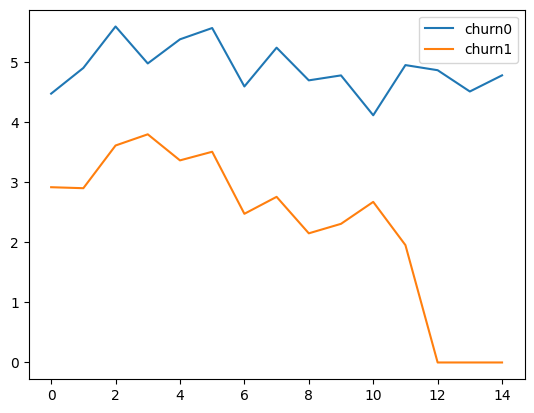

In [248]:
tot.plot()
plt.show()

##### -> 이탈하지 않은 고객들은 월 평균 방문 횟수가 일정한 반면 이탈한 고객들은 시간이 지날수록 감소하는 경향을 보임